In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [18]:
data_path = "../data/predictive_maintenance.csv"

In [19]:
# Laden des Datensatzes (Beispiel: csv-Datei mit den Maschinendaten)
df = pd.read_csv(data_path)

In [20]:
# Aufteilen der Features (X) und Labels (y)
X = df.drop(columns=["Product ID", "Type", "Target", "Failure Type"])  # Features auswaehlen
y = df["Failure Type"]  # Label ist die Spalte "machine_failure"

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and test

In [21]:
# Trainieren des Gradient Boosting Modells
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [22]:
# Vorhersagen auf dem Testdatensatz machen
y_pred = gbm_model.predict(X_test)

# Evaluation

In [ ]:
error_names = [
 'Heat Failure',
 'No Failure',
 'Overstrain Failure',
 'Power Failure',
 'Random Failure',
 'Tool wear Failure'] # get names of errors in correct order for confusion matrix

## Accurracy

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9765


## Classification report

In [24]:
print("Classification Report:")
report = classification_report(y_test, y_pred)
print(report)

Classification Report:
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.76      0.87      0.81        15
              No Failure       0.99      0.99      0.99      1935
      Overstrain Failure       0.50      0.46      0.48        13
           Power Failure       0.79      0.75      0.77        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.98      2000
               macro avg       0.51      0.51      0.51      2000
            weighted avg       0.97      0.98      0.97      2000



## Confusion matrix

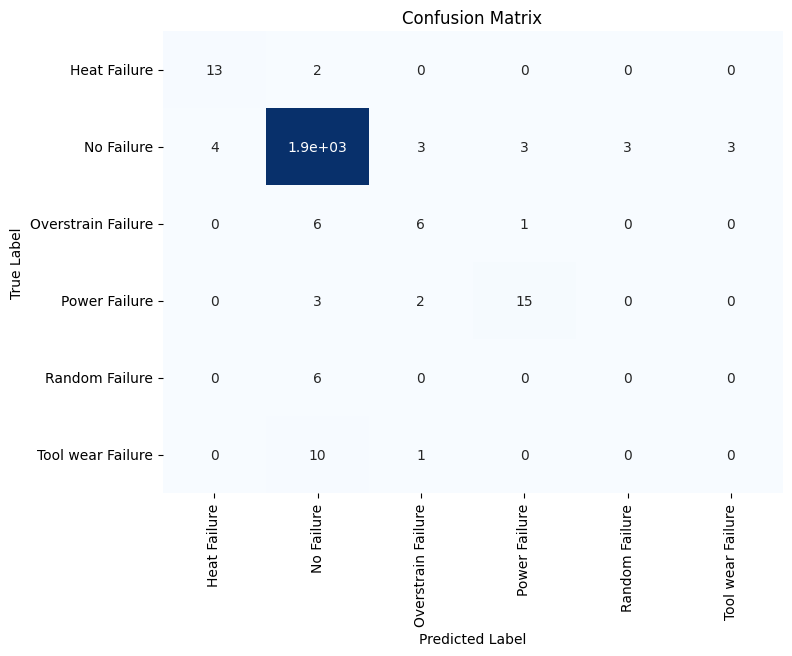

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", cbar=False, xticklabels=error_names, yticklabels=error_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Normalized consuion matrix

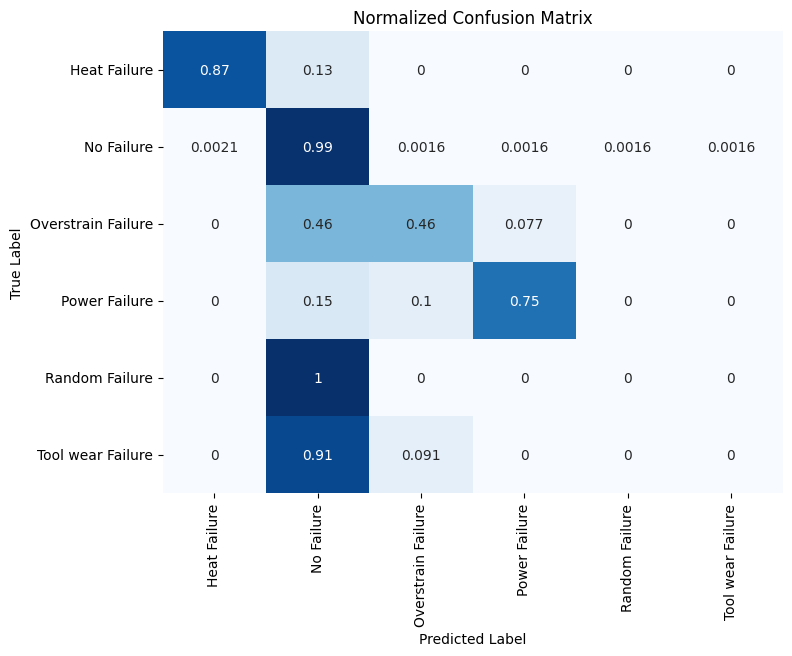

In [29]:
conf_matrix_normalized = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_normalized, annot=True, cmap="Blues", cbar=False, xticklabels=error_names, yticklabels=error_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix")
plt.show()